# Lab 2 - biblioteka pandas: analiza i wizualizacja danych



In [21]:
import pandas as pd  # import biblioteki pandas, to i komorka nizej to na potrzeby pozniejszych eksperymentow z ramkami

In [22]:
movie: pd.DataFrame = pd.read_csv('../data/movie.csv')  # wczytanie ramki z pliku csv

movie.head()  # to tylko testowy podglad czy wczytalo sie poprawnie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Analiza danych

### Rankingowanie obiektów według atrybutu

Operacja ta pozwala na wybór n wierszy, których wartość w wyznaczonej kolumnie jest największa bądź najmniejsza. W tym celu należy skorzystać z metod nlargest lub nsmallest wywoływanych na obiekcie klasy DataFrame, które zwrócą odpowiednio n wierszy o największej lub najmniejszej wartości według wskazanej kolumny. 

Przykład: wybór 10 filmów o największym budżecie:

In [3]:
# 10 filmow z najwiekszym budzetem, zeby ulatwic wyswietlanie wybieramy tylko kolumny movie_title, budget, imdb_score itd

movie.nlargest(10, 'budget')[['movie_title', 'budget', 'imdb_score', 'genres', 'title_year']]

,movie_title,budget,imdb_score,genres,title_year
3787,Lady Vengeance,4.200000e+09,7.7,Crime|Drama,2005.0
2955,Fateless,2.500000e+09,7.1,Drama|Romance|War,2005.0
2294,Princess Mononoke,2.400000e+09,8.4,Adventure|Animation|Fantasy,1997.0
2305,Steamboy,2.127520e+09,6.9,Action|Adventure|Animation|Family|Sci-Fi|Thriller,2004.0
3361,Akira,1.100000e+09,8.1,Action|Animation|Sci-Fi,1988.0
4440,Godzilla 2000,1.000000e+09,6.0,Action|Adventure|Drama|Sci-Fi|Thriller,1999.0
3023,Kabhi Alvida Naa Kehna,7.000000e+08,6.0,Drama,2006.0
3779,Tango,7.000000e+08,7.2,Drama|Musical,1998.0
3216,Kites,6.000000e+08,6.0,Action|Drama|Romance|Thriller,2010.0
1325,Red Cliff,5.536320e+08,7.4,Action|Adventure|Drama|History|War,2008.0


W analogiczny sposób można wyszukać 10 filmów o najmniejszym budżecie:

In [4]:
movie.nsmallest(10, 'budget')[['movie_title', 'budget', 'imdb_score', 'genres', 'title_year']]  # tu to samo co wyzej tylko dla 10 najtanszych filmow

,movie_title,budget,imdb_score,genres,title_year
4684,Tarnation,218.0,7.2,Biography|Documentary,2003.0
4915,My Date with Drew,1100.0,6.6,Documentary,2004.0
4913,A Plague So Pleasant,1400.0,6.3,Drama|Horror|Thriller,2013.0
4909,The Mongol King,3250.0,7.8,Crime|Drama,2005.0
4899,Clean,4500.0,6.9,Drama|Music|Romance,2004.0
4906,Primer,7000.0,7.0,Drama|Sci-Fi|Thriller,2004.0
4907,Cavite,7000.0,6.3,Thriller,2005.0
4908,El Mariachi,7000.0,6.9,Action|Crime|Drama|Romance|Thriller,1992.0
4910,Newlyweds,9000.0,6.4,Comedy|Drama,2011.0
4898,Pink Flamingos,10000.0,6.1,Comedy|Crime|Horror,1972.0


Łącząc wywołania obydwu metod można uzyskać podwójny efekt rankingowania obiektów - według dwóch atrybutów. Przykładowo, można wybrać spośród 10 najtańszych filmów, 5 z najwyższą oceną w serwisie IMDB:

In [5]:
# tutaj wybieramy 10 najtanszych filmow i dla nich tylko te konkretne kolumny, a potem z tej ramki wybieramy 5 filmow z najwyzsza ocena w imdb
movie.nsmallest(10, 'budget')[['movie_title', 'budget', 'imdb_score', 'genres', 'title_year']].nlargest(5, 'imdb_score')

,movie_title,budget,imdb_score,genres,title_year
4909,The Mongol King,3250.0,7.8,Crime|Drama,2005.0
4684,Tarnation,218.0,7.2,Biography|Documentary,2003.0
4906,Primer,7000.0,7.0,Drama|Sci-Fi|Thriller,2004.0
4899,Clean,4500.0,6.9,Drama|Music|Romance,2004.0
4908,El Mariachi,7000.0,6.9,Action|Crime|Drama|Romance|Thriller,1992.0


### Sortowanie ramek danych

Ramki danych (podobnie jak tabele w bazie danych) można sortować według jednej lub wielu kolumn. Służy do tego metoda sort_values wywoływana na obiekcie klasy DataFrame. 

Przykład: sortowanie malejące filmów według długości (kolumna duration).

In [6]:
movie.sort_values('duration', ascending=False).head(15)  # tutaj sortujemy cala ramke wedlug dlugosci malejaco i podgladamy 15 pierwszych wierszy

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1694,Color,NaN,16.0,511.0,NaN,51.0,Ingvar Eggert Sigurðsson,147.0,NaN,Crime|Drama|Thriller,...,19.0,Icelandic,Iceland,NaN,NaN,NaN,63.0,8.2,16.00,0
2436,Color,NaN,108.0,334.0,NaN,30.0,Nora von Waldstätten,897.0,145118.0,Biography|Crime|Drama|Thriller,...,36.0,English,France,Not Rated,NaN,NaN,30.0,7.7,2.35,0
1487,Color,Taylor Hackford,12.0,330.0,138.0,672.0,Jesse Borrego,848.0,4496583.0,Crime|Drama,...,129.0,English,USA,R,35000000.0,1993.0,674.0,8.0,1.66,6000
1134,Color,Michael Cimino,102.0,325.0,517.0,678.0,Sam Waterston,12000.0,1500000.0,Adventure|Drama|Western,...,189.0,English,USA,R,44000000.0,1980.0,849.0,6.8,2.35,1000
3254,Color,Chatrichalerm Yukol,31.0,300.0,6.0,6.0,Chatchai Plengpanich,7.0,454255.0,Action|Adventure|Drama|History|War,...,47.0,Thai,Thailand,R,400000000.0,2001.0,6.0,6.6,1.85,124
2922,Color,Wolfgang Petersen,96.0,293.0,249.0,18.0,Martin Semmelrogge,362.0,11433134.0,Adventure|Drama|Thriller|War,...,426.0,German,West Germany,R,14000000.0,1981.0,21.0,8.4,1.85,11000
1556,Color,Francis Ford Coppola,261.0,289.0,0.0,3000.0,Marlon Brando,11000.0,78800000.0,Drama|War,...,983.0,English,USA,R,31500000.0,1979.0,10000.0,8.5,2.35,19000
2687,Color,NaN,9.0,286.0,NaN,527.0,Tom Hollander,857.0,NaN,Drama|History|Thriller,...,39.0,English,USA,NaN,NaN,NaN,555.0,7.9,1.78,733
874,Color,Ron Maxwell,84.0,280.0,33.0,67.0,Bruce Boxleitner,789.0,12870569.0,Drama|History|War,...,497.0,English,USA,PG-13,56000000.0,2003.0,640.0,6.3,2.35,953
1963,Color,Ron Maxwell,22.0,271.0,33.0,251.0,William Morgan Sheppard,854.0,10769960.0,Drama|History|War,...,256.0,English,USA,PG,25000000.0,1993.0,702.0,7.7,1.85,0


W podobny sposób można dokonać sortowania ramki według wielu kolumn. Należy jednak pamiętać o przekazaniu kolekcji nazw kolumn w metodzie sort_values. Poniższy przykład przedstawia sortowanie ramki według kolumny duration malejąco, a następnie według kolumny imdb_score:

In [7]:
# sortujemy oryginalna ramke malejaco najpierw po dlugosci filmu potem po ocenie (jezeli beda 2 filmy tej same dlugosci to ulozy je wtedy wg oceny)
# a potem wybieramy tylko kolumny movie_title, duration, imdb_score itd i podgladamy z tego 20 pierwszych wierszy
movie.sort_values(['duration', 'imdb_score'], ascending=False)[['movie_title', 'duration', 'imdb_score', 'genres']].head(20)

,movie_title,duration,imdb_score,genres
1694,Trapped,511.0,8.2,Crime|Drama|Thriller
2436,Carlos,334.0,7.7,Biography|Crime|Drama|Thriller
1487,"Blood In, Blood Out",330.0,8.0,Crime|Drama
1134,Heaven's Gate,325.0,6.8,Adventure|Drama|Western
3254,The Legend of Suriyothai,300.0,6.6,Action|Adventure|Drama|History|War
2922,Das Boot,293.0,8.4,Adventure|Drama|Thriller|War
1556,Apocalypse Now,289.0,8.5,Drama|War
2687,The Company,286.0,7.9,Drama|History|Thriller
874,Gods and Generals,280.0,6.3,Drama|History|War
1963,Gettysburg,271.0,7.7,Drama|History|War


### Usuwanie duplikatów

Do usuwania duplikatów (wierszy o takich samych wartościach w wyznaczonej kolumnie) służy metoda drop_duplicates. Metoda (podobnie jak poprzednie) nie zastępuje oryginalnej ramki, lecz zwraca jej zmodyfikowaną kopię, zatem może posłużyć do przefiltrowania, lub pogrupowania oryginalnych danych. Przykładowo, znalezienie najwyżej ocenionego filmu w każdym roku:

In [8]:
# najpierw wybieramy kolumny movie_title, imdb_score itd z oryginalnej ramki, potem sortujemy po title_year i imdb_score malejaco i usuwamy duplikaty
# co da nam najwyzej oceniony film w kazdym roku
movie[['movie_title', 'imdb_score', 'title_year']].sort_values(['title_year', 'imdb_score'], ascending=False).drop_duplicates(subset='title_year')

,movie_title,imdb_score,title_year
4312,Kickboxer: Vengeance,9.1,2016.0
3745,Running Forever,8.6,2015.0
4369,Queen of the Mountains,8.7,2014.0
3935,"Batman: The Dark Knight Returns, Part 2",8.4,2013.0
3,The Dark Knight Rises,8.5,2012.0
...,...,...,...
2694,Metropolis,8.3,1927.0
4767,The Big Parade,8.3,1925.0
4833,Over the Hill to the Poorhouse,4.8,1920.0
4695,Intolerance: Love's Struggle Throughout the Ages,8.0,1916.0


### Agregacja danych

Agregacja danych polega na grupowaniu wierszy według wyznaczonej kolumny, a następnie na zastosowaniu funkcji agregacyjnej, która obliczy pewne wartości dla wyznaczonych atrybutów w pogrupowanych wierszach. Funkcją agregującą może być np. suma bądź średnia arytmetyczna. Do grupowania wierszy służy metoda groupby wywoływana na obiekcie klasy DataFrame oraz zwraca pogrupowaną ramkę w postaci obiektu klasy DataFrameGroupBy. Do zastosowania funkcji agregujących służy metoda agg wywoływana na obiekcie klasy DataFrameGroupBy.

Przykład: średnia ocena filmu w każdym roku.

In [9]:
# grupujemy filmy wedlug roku (utworzy sie nowa ramka o innym typie, w ktorej wiersze beda pogrupowane wg roku)
# i dla kazdej grupy wyliczamy srednia wartosc z kolumny imdb_score, potem sortujemy malejaco po kolumnie title_year
movie.groupby('title_year').agg({'imdb_score': 'mean'}).sort_values('title_year', ascending=False)

,imdb_score
title_year,
2016.0,6.366327
2015.0,6.038863
2014.0,6.244856
2013.0,6.361039
2012.0,6.251402
...,...
1929.0,7.150000
1927.0,8.300000
1925.0,8.300000


W podobny sposób można uzyskać łączny budżet filmów nakręconych przez każdego z reżyserów:

In [10]:
# grupujemy filmy wg rezysera (kolumna director_name) i w kazdej grupie obliczamy sume w kolumnie budget a potem sortujemy malejaco wg zsumowanego budzetu
# czyli mamy ile kosztowaly filmy kazdego rezysera, wartosc 4.21e+09 to (4.21 * 10 ^ 9)
movie.groupby('director_name').agg({'budget': 'sum'}).sort_values('budget', ascending=False)

,budget
director_name,
Chan-wook Park,4.215000e+09
Katsuhiro Ôtomo,3.227520e+09
Lajos Koltai,2.500000e+09
Hayao Miyazaki,2.477000e+09
Steven Spielberg,1.662901e+09
...,...
John Turturro,0.000000e+00
Jonathan Parker,0.000000e+00
Aaron Hann,0.000000e+00


Analogicznie można uzyskać dla każdego kraju liczbę wyprodukowanych filmów oraz średni i całkowity budżet:

In [11]:
# grupujemy filmy wg krahu produkcji (kolumna country) i dla kazdej grupy obliczamy sume i srednia z kolumny budget czyli zsumowany i usredniony budzet
# oraz liczymy (count) ile jest tytulow co da nam podsumowanie o calkowitym i srednim budzecie filmu wg kraju oraz ile ich wyprodukowano
movie.groupby('country').agg({'budget': ['sum', 'mean'], 'movie_title': 'count'})

budget               movie_title
                               sum          mean       count
country                                                     
Afghanistan           4.600000e+04  4.600000e+04           1
Argentina             5.700000e+06  1.425000e+06           4
Aruba                 3.500000e+07  3.500000e+07           1
Australia             1.423606e+09  2.965845e+07          53
Bahamas               5.000000e+06  5.000000e+06           1
...                            ...           ...         ...
Turkey                8.300000e+06  8.300000e+06           1
UK                    9.660139e+09  2.646613e+07         434
USA                   1.202305e+11  3.520658e+07        3710
United Arab Emirates  1.250000e+05  1.250000e+05           1
West Germany          4.100000e+07  2.050000e+07           3

[65 rows x 3 columns]

### Własne funkcje agregujące

Biblioteka pandas umożliwia wykorzystywanie własnych funkcji podczas agregacji danych. Taka funkcja powinna przyjmować jeden argument w postaci serii danych oraz zwracać dowolną wartośc skalarną.

Przykład: średni wynik filmu uzyskany w każdym roku przy użyciu własnej funkcji agregującej.

In [12]:
def my_mean(x: pd.Series) -> float:  # funkcja przyjmuje argument x jako serie danych (kolumna z ramki) i zwraca float (ale inna f. agregujaca moze zwracac cos innego)
  return x.sum() / x.count()  # i tutaj zwracamy srednia czyli suma wartosci z serii podzielona przez ilosc tych wartosci

In [23]:
my_mean

<function __main__.my_mean(x: pandas.core.series.Series) -> float>

In [13]:
# i tutaj jeszcze raz grupujemy filmy wg roku i obliczamy srednia ocene, ale tym razem korzystajac z wlasnej funkcji agregujacej
# wyniki sortujemy malejaco wg roku
movie.groupby('title_year').agg({'imdb_score': my_mean}).sort_values('title_year', ascending=False)

,imdb_score
title_year,
2016.0,6.366327
2015.0,6.038863
2014.0,6.244856
2013.0,6.361039
2012.0,6.251402
...,...
1929.0,7.150000
1927.0,8.300000
1925.0,8.300000


### Filtrowanie danych

Do filtrowania danych służy metoda query wywoływana na obiekcie klasy DataFrame. Parametrem metody jest konstrukcja [nazwa_kolumny] [operator_logiczny] [wartosc], np. country == "Poland", która pozwala wybrać wszystkie wiersze pasujące do maski.

Przykład: wybór wszystkich filmów autorstwa Jamesa Camerona.

In [24]:
# to jest podobne where w SQL, tworzymy warunek wyszukiwania
movie.query('director_name == "James Cameron"')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4911,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
4912,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
4913,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
4914,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


Łącząc wyrażenia logiczne spójnikami and i or można konstruować złożone maski przeszukiwania danych w ramkach. 

Przykład: wszystkie filmy Jamesa Camerona wyprodukowane przed rokiem 1989.

In [15]:
# tutaj najpierw wybieramy kolumny ktore chcemy z oryginalnej ramki i znoqu za pomoca query robimy wyszukiwanie wartosci pasujacych do kryteriow
movie[['director_name', 'movie_title', 'title_year']].query('director_name == "James Cameron" and title_year < 1989')

,director_name,movie_title,title_year
2455,James Cameron,Aliens,1986.0
3508,James Cameron,The Terminator,1984.0


## Wizualizacja danych

Biblioteka pandas udostępnia wygodny interfejs służący do wizualizacji danych znajdujących się w ramkach. Metody generujące wykresy w bibliotece pandas wykorzystują "pod spodem" bibliotekę matplotlib. W celu poprawnej prezentacji wykresu (niezależnie od środowiska) należy również zaimportować bibliotekę matplotlib. 



In [16]:
# matplotlib przyda sie do personalizacji wykresow i wyswietlania ich bez zbednych smieci niezaleznie czy to jupyter czy pycharm
import matplotlib.pyplot as plt

# to piszemy tylko w jupyter, pozwala wygodnie wyswietlac wizualizacje
%matplotlib inline

### Wykres liniowy

Najprostszą wersję wykresu liniowego można uzyskać wywołując metodę plot na serii danych. Wówczas na osi x wykresu znajdą się wartości pochodzące z indeksu wierszy prezentowanej ramki lub serii, a na osi y znajdą się docelowe wartości.

Przykład: wykres liniowy średniej długości filmu według roku

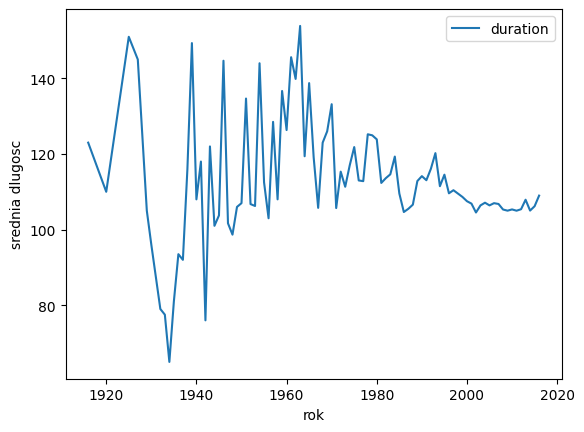

In [27]:
# tworzymy obiekt klasy Axes z pakietu matplotlib, w ktorym siedzi wykres, wizualizujemy tutaj serie (index i jedna kolumna) wiec bedzie jeden wykres
ax: plt.Axes = movie.groupby('title_year').agg({'duration': 'mean'}).plot()
ax.set_ylabel('srednia dlugosc')  # dodajemy na obiekcie wykresu etykiete osi y (pionowej)
ax.set_xlabel('rok')

plt.show()  # i uzywamy funkcji show z pakietu matplotlib do wyswietlenia wykresu bez zbednych smieci, funkcja sama zlapie zeby wyswietlic obiekt ax

Biblioteka pandas umożliwia również wizualizację liniową ramek, gdzie wartości zostaną przedstawione w postaci kilku nakładających się wykresów liniowych.

Przykład: średnia długość oraz liczba filmów według roku.

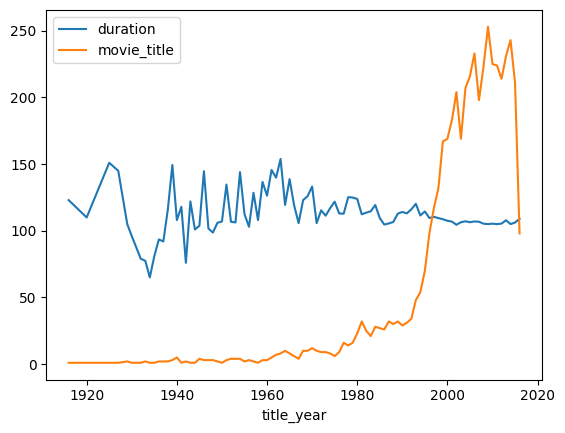

In [18]:
# tutaj znowu tworzymy obiekt wykresu, ale tym razem wywolujemy metode plot na ramce wiec bedzie kilka wykresow (tutaj 2)
ax: plt.Axes = movie.groupby('title_year').agg({'duration': 'mean', 'movie_title': 'count'}).plot()

plt.show()  # i funkcja show pokaze wykres z obiektu ax

### Wykres kolumnowy

Do tworzenia wykresów kolumnowych w bibliotece pandas służy metoda bar.

Przykład: wykres kolumnowy średniej oceny filmu dla każdego języka

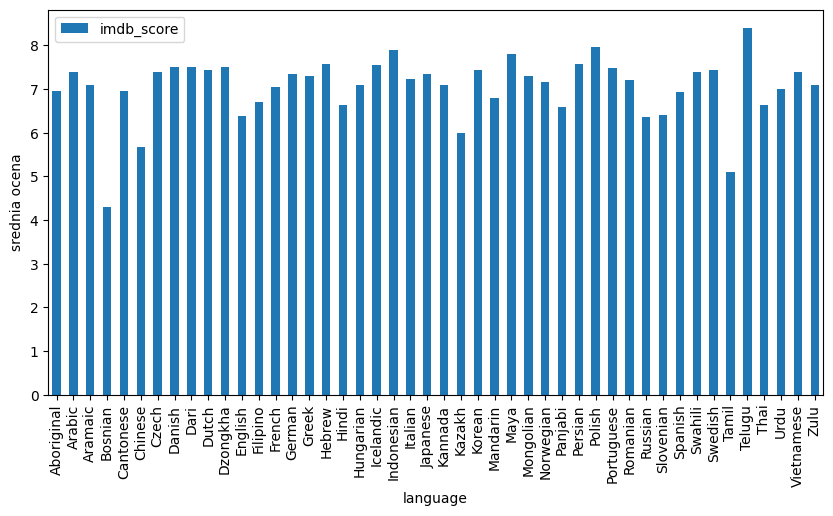

In [28]:
# tutaj tworzymy znowu obiekt wykresu, za pomoca figsize wskazalismy proporcje szerokosci do wysokosci 10:5
ax: plt.Axes = movie.groupby('language').agg({'imdb_score': 'mean'}).plot.bar(figsize=(10, 5))
ax.set_ylabel('srednia ocena')  # i na obiekcie wykresu znow nadalismy etykiete osi y

plt.show()  # i wyswietlamy

### Wykres kołowy

Do utworzenia wykresu kołowego służy metoda pie.

Przykład: wykres kołowy przedstawiający udział filmów kolorowych i czarno-białych pośród wszystkich filmów

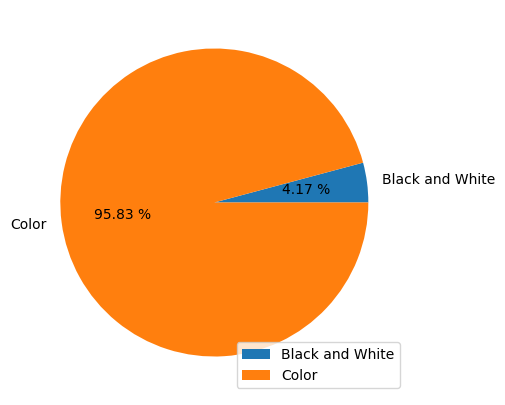

In [29]:
# tworzymy obiekt wykresu, (subplots=True musi byc zeby zwizualizowala sie seria nie ramka), autopct to format wyswietlania % tych kawalkow kola
# ylabel='' usuwamy w ten sposob niepotrzebna etykiete osi y, figsize czyli proporcje wizualizacji 5:5
ax: plt.Axes = movie.groupby('color').agg({'color': 'count'}).plot.pie(subplots=True, autopct='%.2f %%', ylabel='', figsize=(5, 5))

plt.show()  # i wyswietlamy

## Zadania

1. Wczytać do ramki dane z pliku movie.csv.
2. Przygotować wykres słupkowy, w którym na osi x znajdzie się 10 lat, w których wystąpił najwyższy średni budżet filmów. Nadać tytuł osi y: "budget".
3. Przygotować wykres słupkowy przedstawiający oceny 20 najtańszych filmów. Na osi x umieścić tytuły filmów, a na osi y umieścić średnią ocenę.
4. Przygotować wykres liniowy przedstawiający sumę wartości w kolumnach: actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes w każdym roku.
5. Przygotować wykres liniowy przedstawiający zsumowane wartości w każdym roku dla kolumn: cast_total_facebook_likes oraz movie_facebook_likes dla wszystkich filmów, których budżet mieści się w przedziale [m-s, m+s], gdzie m oznacza średni budżet, a s oznacza odchylenie standardowe budżetu.
6. Przygotować wykres kołowy przedstawiający udział każdego reżysera w 20 najdroższych filmach.